In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np  
sns.set(style="whitegrid")

In [9]:
path = "../data/first_order_df.csv"
df = pd.read_csv(path)

print("First 5 rows of dataset\n")
df.head()

First 5 rows of dataset



,Unnamed: 0,TxHash,BlockHeight,TimeStamp,From,To,Value,isError
0,0,0xaca3850ba0080cf47b47f80e46da452f61bcbb5470d3...,5848095,1529873859,0x16f209b5332a1b4fa5bf19497ca40154c5db2f85,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.500000,0
1,1,0x95681862f9778e49caecf603dd911d6ed57f7799d89d...,5848181,1529875104,0xe7e07e44ee315b5f2d076340b2b7a5cc9a4ee57b,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.001020,0
2,2,0x716ae3961b50186a0bbc272cfcc4555662f7fe33550f...,5848716,1529883192,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0xe892875b87b94c44edf0e91ee9f49d0525fadd83,0.500390,0
3,3,0xf397197b800d6cc055a4db265b5e9df3dd2aa745c813...,5849038,1529887684,0x0681d8db095565fe8a346fa0277bffde9c0edbbf,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.817800,0
4,4,0x7f8086011a32f128dba57fe06fc5f4a181d2f5401e5a...,5849437,1529893144,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0xe892875b87b94c44edf0e91ee9f49d0525fadd83,0.817506,0


In [14]:
print("Dataset Information\n")
df.info()

print(f"\nDataset Shape: {df.shape}")

Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254973 entries, 0 to 254972
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   254973 non-null  int64  
 1   TxHash       254973 non-null  object 
 2   BlockHeight  254973 non-null  int64  
 3   TimeStamp    254973 non-null  int64  
 4   From         254973 non-null  object 
 5   To           254642 non-null  object 
 6   Value        254973 non-null  float64
 7   isError      254973 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.6+ MB

Dataset Shape: (254973, 8)


In [16]:
print("Summary Statistics:")
display(df.describe())

print("\nUnique Values Count:")
print(f"Unique TxHash: {df['TxHash'].nunique()}")
print(f"Unique From Addresses: {df['From'].nunique()}")
print(f"Unique To Addresses: {df['To'].nunique()}")
print(f"Unique isError Values: {df['isError'].unique()}")

Summary Statistics:


,Unnamed: 0,BlockHeight,TimeStamp,Value,isError
count,254973.00000,2.549730e+05,2.549730e+05,254973.000000,254973.000000
mean,127486.00000,5.391963e+06,1.522941e+09,4.784175,0.061316
std,73604.50943,7.332419e+05,1.107530e+07,207.403848,0.239910
min,0.00000,2.722620e+06,1.480521e+09,0.000000,0.000000
25%,63743.00000,4.908133e+06,1.515950e+09,0.000000,0.000000
50%,127486.00000,5.356399e+06,1.522521e+09,0.012500,0.000000
75%,191229.00000,5.855385e+06,1.529985e+09,0.500000,0.000000
max,254972.00000,7.781130e+06,1.558142e+09,25533.614518,1.000000



Unique Values Count:
Unique TxHash: 102149
Unique From Addresses: 37241
Unique To Addresses: 13392
Unique isError Values: [0 1]


In [21]:
print("Missing Values per Column:")
display(df.isnull().sum())

# plt.figure(figsize=(10, 6))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Values Heatmap')
# plt.show()

Missing Values per Column:


Unnamed: 0       0
TxHash           0
BlockHeight      0
TimeStamp        0
From             0
To             331
Value            0
isError          0
dtype: int64

In [22]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], unit='s')

print("Dataset after TimeStamp Conversion:")
display(df.head())

Dataset after TimeStamp Conversion:


,Unnamed: 0,TxHash,BlockHeight,TimeStamp,From,To,Value,isError
0,0,0xaca3850ba0080cf47b47f80e46da452f61bcbb5470d3...,5848095,2018-06-24 20:57:39,0x16f209b5332a1b4fa5bf19497ca40154c5db2f85,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.500000,0
1,1,0x95681862f9778e49caecf603dd911d6ed57f7799d89d...,5848181,2018-06-24 21:18:24,0xe7e07e44ee315b5f2d076340b2b7a5cc9a4ee57b,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.001020,0
2,2,0x716ae3961b50186a0bbc272cfcc4555662f7fe33550f...,5848716,2018-06-24 23:33:12,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0xe892875b87b94c44edf0e91ee9f49d0525fadd83,0.500390,0
3,3,0xf397197b800d6cc055a4db265b5e9df3dd2aa745c813...,5849038,2018-06-25 00:48:04,0x0681d8db095565fe8a346fa0277bffde9c0edbbf,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.817800,0
4,4,0x7f8086011a32f128dba57fe06fc5f4a181d2f5401e5a...,5849437,2018-06-25 02:19:04,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0xe892875b87b94c44edf0e91ee9f49d0525fadd83,0.817506,0


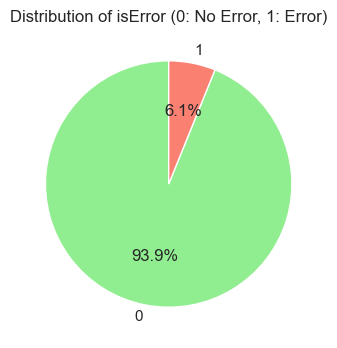

Non-Error Transactions: 239339
Error Transactions: 15634
Error Rate: 6.13%


In [25]:
# Cell 7: Analyze isError distribution (potential fraud label)
# isError is binary (0/1). Use a pie chart to visualize the proportion of errors (fraudulent vs non-fraudulent).
# This is key for imbalance check in fraud detection datasets, where fraud is often rare.
error_counts = df['isError'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(error_counts, labels=error_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Distribution of isError (0: No Error, 1: Error)')
plt.show()

# Text summary
print(f"Non-Error Transactions: {error_counts.get(0, 0)}")
print(f"Error Transactions: {error_counts.get(1, 0)}")
print(f"Error Rate: {error_counts.get(1, 0) / len(df) * 100:.2f}%")

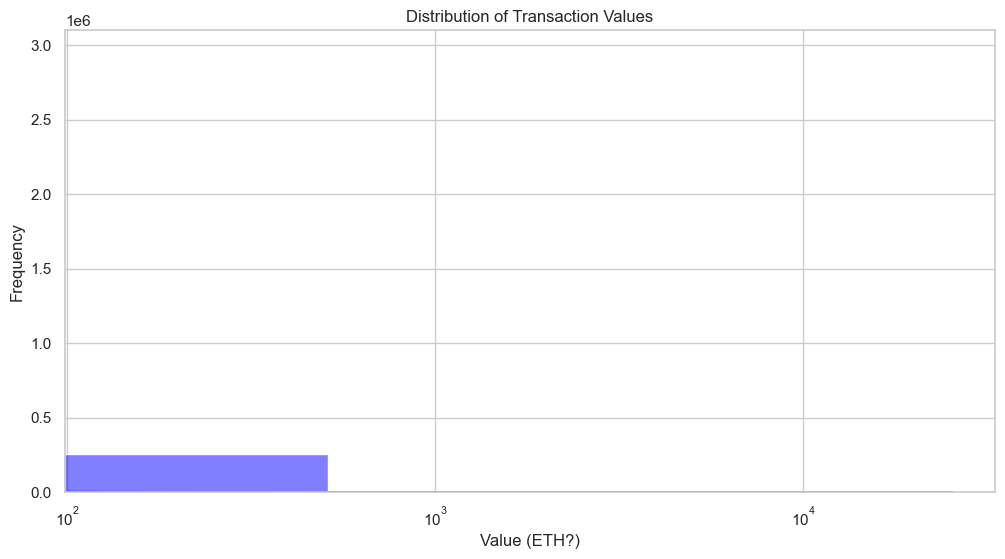

Value Skewness: 103.54 (Positive skew indicates right-tailed distribution)
Value Kurtosis: 11659.53 (High kurtosis means heavy tails/outliers)


In [26]:
# Cell 8: Histogram of Transaction Values
# Plot the distribution of 'Value' to see how transaction amounts are spread.
# Use log scale if skewed (common in crypto transactions) to handle outliers and visualize small vs large values.
plt.figure(figsize=(12, 6))
sns.histplot(df['Value'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Values')
plt.xlabel('Value (ETH?)')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale for better visibility if values vary widely
plt.show()

# Text insights: Skewness and kurtosis for depth
print(f"Value Skewness: {df['Value'].skew():.2f} (Positive skew indicates right-tailed distribution)")
print(f"Value Kurtosis: {df['Value'].kurt():.2f} (High kurtosis means heavy tails/outliers)")

In [27]:
pip install -q scipy

Note: you may need to restart the kernel to use updated packages.


C:\Users\hp\AppData\Local\Temp\ipykernel_22584\3515018560.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isError', y='Value', data=df, palette='Set2')


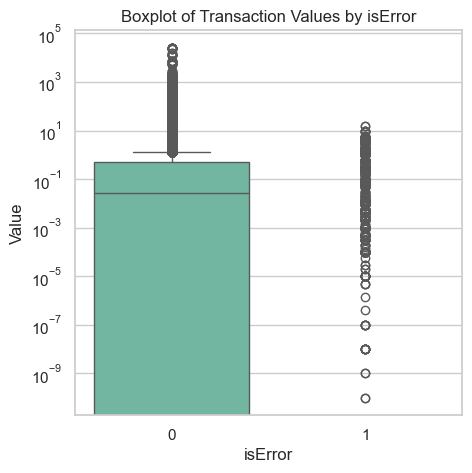

T-test for Value difference: t-stat=2.96, p-value=0.0031


In [29]:
# Cell 9: Boxplot of Values by isError
# Compare Value distributions between error and non-error transactions.
# This can reveal if fraudulent transactions have different value patterns (e.g., smaller or larger amounts).
plt.figure(figsize=(5, 5))
sns.boxplot(x='isError', y='Value', data=df, palette='Set2')
plt.title('Boxplot of Transaction Values by isError')
plt.yscale('log')  # Log scale for outliers
plt.show()

# Statistical test for difference (e.g., t-test if applicable, but for depth)
from scipy.stats import ttest_ind
non_error_values = df[df['isError'] == 0]['Value']
error_values = df[df['isError'] == 1]['Value']
if len(error_values) > 0:
    t_stat, p_val = ttest_ind(non_error_values, error_values)
    print(f"T-test for Value difference: t-stat={t_stat:.2f}, p-value={p_val:.4f}")
else:
    print("No error transactions for comparison.")

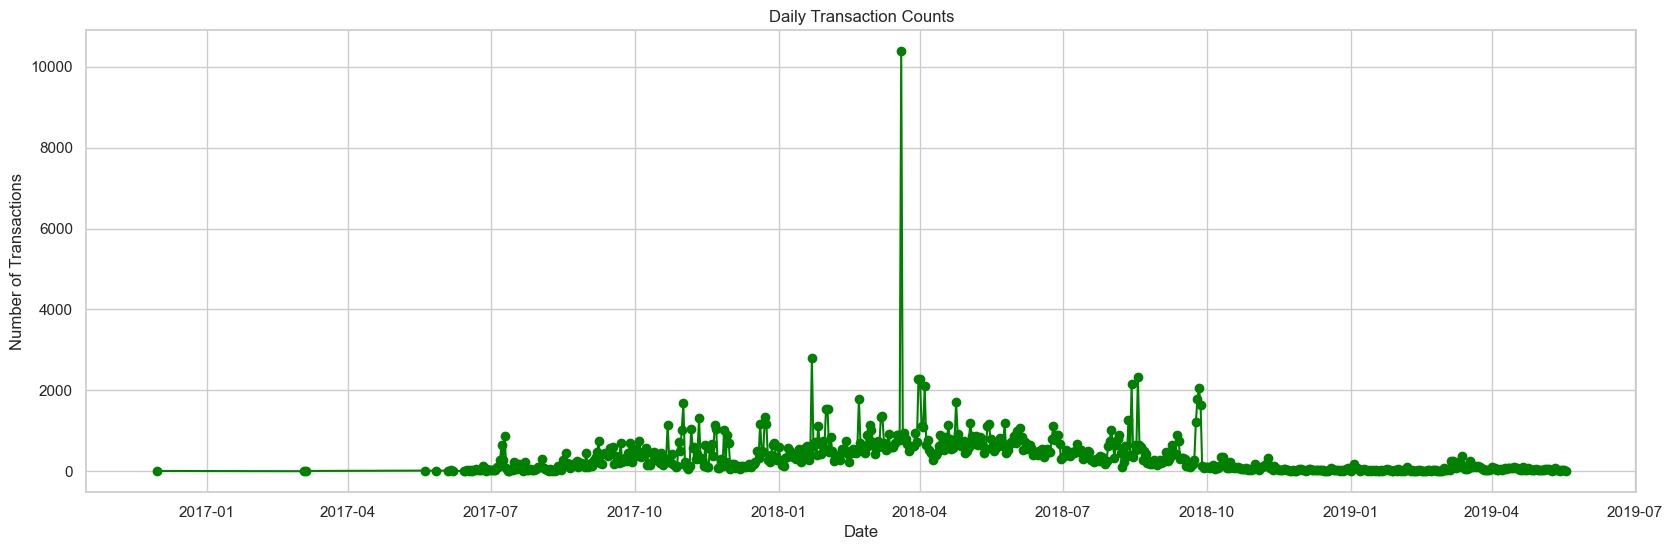

Total Days Covered: 712
Average Daily Transactions: 358.11
Max Daily Transactions: 10381 on 2018-03-20


In [31]:
# Cell 10: Time series plot of transaction counts over time
# Group by date and count transactions to see volume trends.
# This helps identify peaks, trends, or seasonality in blockchain activity.
df['Date'] = df['TimeStamp'].dt.date  # Extract date for grouping
daily_counts = df.groupby('Date').size()

plt.figure(figsize=(20, 6))
daily_counts.plot(kind='line', marker='o', color='green')
plt.title('Daily Transaction Counts')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

# Text: Trend analysis
print(f"Total Days Covered: {len(daily_counts)}")
print(f"Average Daily Transactions: {daily_counts.mean():.2f}")
print(f"Max Daily Transactions: {daily_counts.max()} on {daily_counts.idxmax()}")

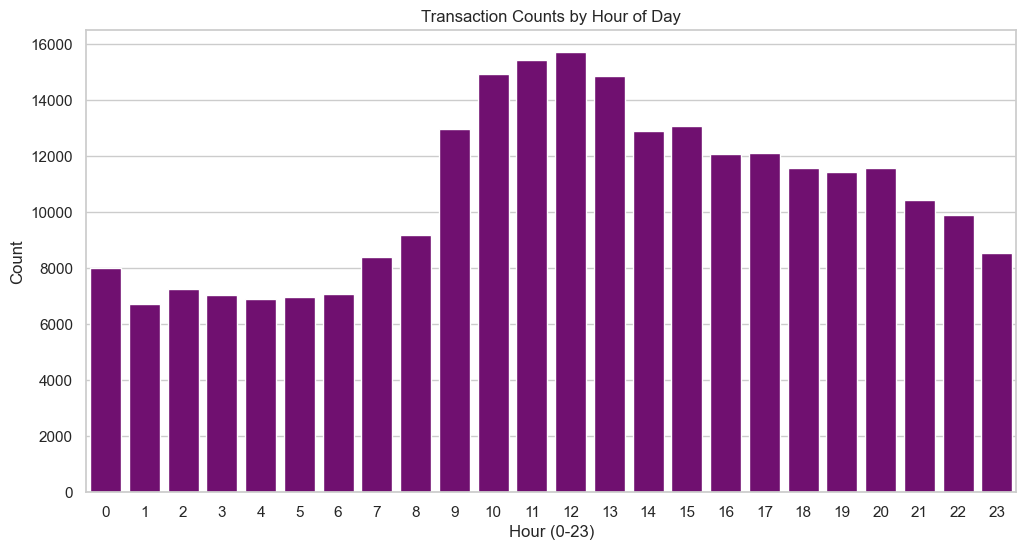

Percentage of Errors by Hour:


isError,0,1
Hour,,
0,91.972448,8.027552
1,92.415229,7.584771
2,91.962436,8.037564
3,92.125872,7.874128
4,92.170509,7.829491
5,92.670308,7.329692
6,92.345714,7.654286
7,93.062344,6.937656
8,93.603574,6.396426


In [32]:
# Cell 11: Transaction counts by hour of day
# Extract hour from TimeStamp and plot to find intraday patterns.
# Useful for detecting if fraud occurs at specific times (e.g., off-hours).
df['Hour'] = df['TimeStamp'].dt.hour
hourly_counts = df.groupby('Hour').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='purple')
plt.title('Transaction Counts by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Count')
plt.show()

# Cross-tab with isError for deeper insight
hourly_error = pd.crosstab(df['Hour'], df['isError'], normalize='index') * 100
print("Percentage of Errors by Hour:")
display(hourly_error)

C:\Users\hp\AppData\Local\Temp\ipykernel_22584\2454937521.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_from.values, y=top_from.index, ax=axes[0], palette='Blues_d')
C:\Users\hp\AppData\Local\Temp\ipykernel_22584\2454937521.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_to.values, y=top_to.index, ax=axes[1], palette='Greens_d')


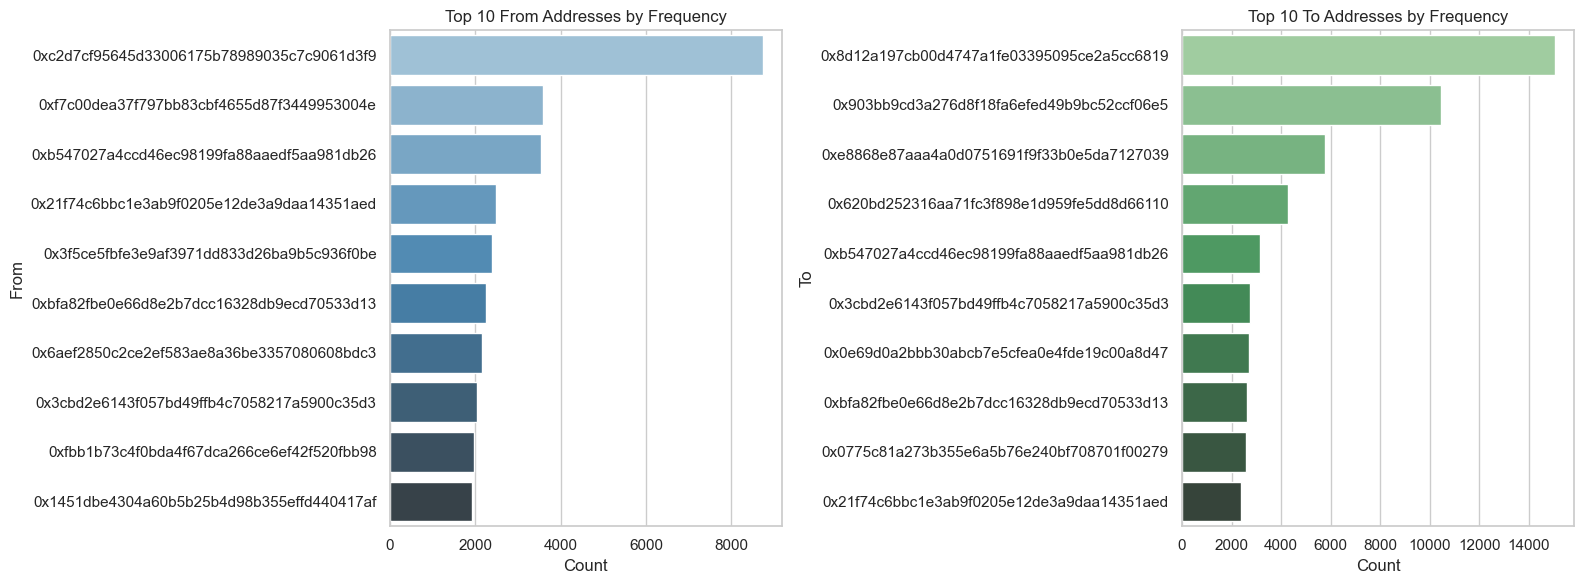

Common Addresses in Top 10 From and To: {'0x3cbd2e6143f057bd49ffb4c7058217a5900c35d3', '0x21f74c6bbc1e3ab9f0205e12de3a9daa14351aed', '0xbfa82fbe0e66d8e2b7dcc16328db9ecd70533d13', '0xb547027a4ccd46ec98199fa88aaedf5aa981db26'}


In [33]:
# Cell 12: Top 10 From and To addresses by frequency
# Count occurrences of sender/receiver addresses to identify frequent users.
# This can highlight wallets involved in many transactions, potential hotspots for fraud.
top_from = df['From'].value_counts().head(10)
top_to = df['To'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=top_from.values, y=top_from.index, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 From Addresses by Frequency')
axes[0].set_xlabel('Count')

sns.barplot(x=top_to.values, y=top_to.index, ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 To Addresses by Frequency')
axes[1].set_xlabel('Count')
plt.tight_layout()
plt.show()

# Text: Check if any address is both top sender and receiver
common_addresses = set(top_from.index) & set(top_to.index)
print(f"Common Addresses in Top 10 From and To: {common_addresses}")

C:\Users\hp\AppData\Local\Temp\ipykernel_22584\1574562980.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=from_value_sum.values, y=from_value_sum.index, ax=axes[0], palette='Oranges_d')
C:\Users\hp\AppData\Local\Temp\ipykernel_22584\1574562980.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=to_value_sum.values, y=to_value_sum.index, ax=axes[1], palette='Purples_d')


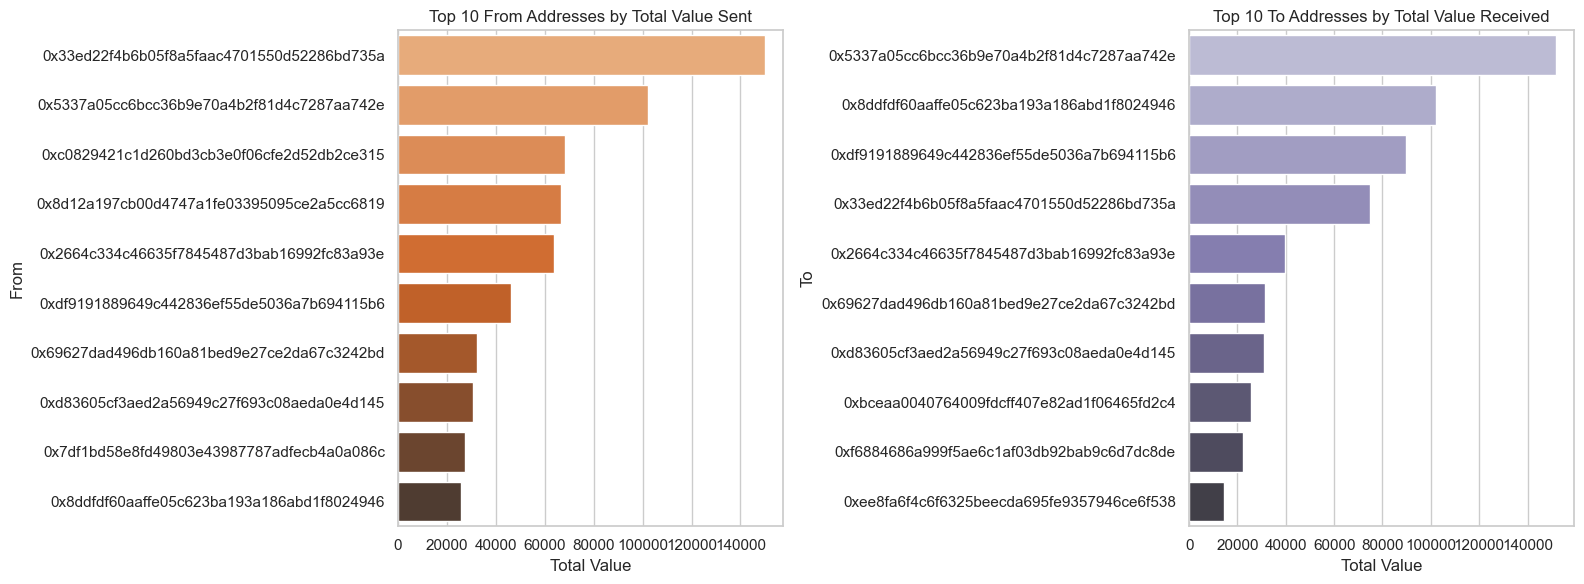

Avg Value for Non-Error: 5.0952
Avg Value for Error: 0.0230


In [34]:
# Cell 13: Top addresses by total Value sent/received
# Sum Values for each From/To to see high-value players.
# This complements frequency by showing economic impact, useful for anomaly detection.
from_value_sum = df.groupby('From')['Value'].sum().sort_values(ascending=False).head(10)
to_value_sum = df.groupby('To')['Value'].sum().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=from_value_sum.values, y=from_value_sum.index, ax=axes[0], palette='Oranges_d')
axes[0].set_title('Top 10 From Addresses by Total Value Sent')
axes[0].set_xlabel('Total Value')

sns.barplot(x=to_value_sum.values, y=to_value_sum.index, ax=axes[1], palette='Purples_d')
axes[1].set_title('Top 10 To Addresses by Total Value Received')
axes[1].set_xlabel('Total Value')
plt.tight_layout()
plt.show()

# Correlation with errors: Average Value for error vs non-error
print(f"Avg Value for Non-Error: {non_error_values.mean():.4f}")
if len(error_values) > 0:
    print(f"Avg Value for Error: {error_values.mean():.4f}")

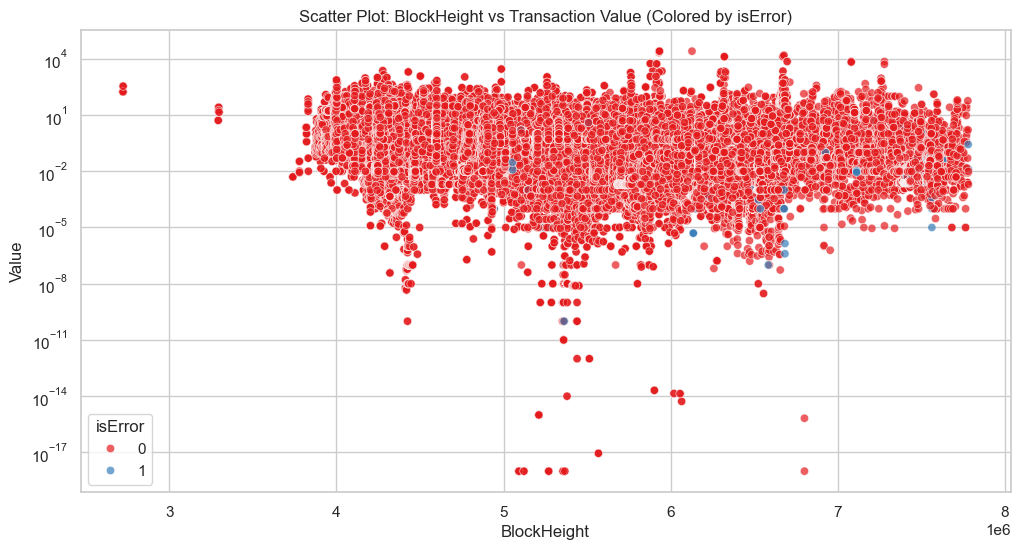

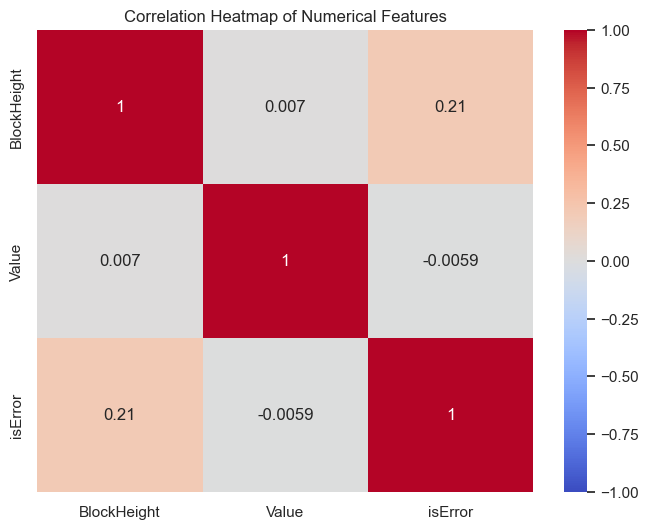

In [35]:
# Cell 14: Scatter plot of BlockHeight vs Value
# Plot to see if transaction values change with block height (proxy for time).
# Add color by isError for patterns in errors over blockchain progression.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BlockHeight', y='Value', hue='isError', data=df, palette='Set1', alpha=0.7)
plt.title('Scatter Plot: BlockHeight vs Transaction Value (Colored by isError)')
plt.yscale('log')
plt.show()

# Correlation matrix for numerical columns
numerical_cols = ['BlockHeight', 'Value', 'isError']  # TimeStamp excluded as it's datetime now
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

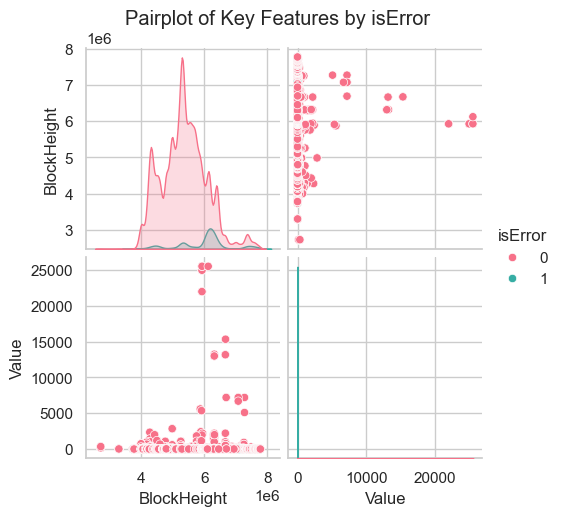

In [36]:
# Cell 15: Pairplot for multivariate analysis
# Visualize relationships between all numerical pairs, colored by isError.
# This provides a deep overview of interactions, clusters, and separations between classes.
sns.pairplot(df[numerical_cols + ['TimeStamp'].copy()], hue='isError', palette='husl')  # TimeStamp as float for plotting
plt.suptitle('Pairplot of Key Features by isError', y=1.02)
plt.show()

Top 10 From-To Pairs by Frequency:


From                                        To                                        
0xc2d7cf95645d33006175b78989035c7c9061d3f9  0x620bd252316aa71fc3f898e1d959fe5dd8d66110    4277
0xf7c00dea37f797bb83cbf4655d87f3449953004e  0x0775c81a273b355e6a5b76e240bf708701f00279    2594
0xbfa82fbe0e66d8e2b7dcc16328db9ecd70533d13  0x5df65e16d6ec1a8090ffa11c8185ad372a8786cd    2241
0xc2d7cf95645d33006175b78989035c7c9061d3f9  0x1dfabf381d80dd29d43bc347207b30a5c484bbd0    1922
                                            0x0e69d0a2bbb30abcb7e5cfea0e4fde19c00a8d47    1908
0x6aef2850c2ce2ef583ae8a36be3357080608bdc3  0x8d12a197cb00d4747a1fe03395095ce2a5cc6819    1632
0xf2bad87c0d0ea8bda69c722368df4f79d92ee6c9  0x29d06aa32e8b6f7de97dc3245a2d9b543e6584c7    1138
0xb00548770ea87482f024cd4292a975fea72e8f01  0x8d12a197cb00d4747a1fe03395095ce2a5cc6819    1137
0x1451dbe4304a60b5b25b4d98b355effd440417af  0x8d12a197cb00d4747a1fe03395095ce2a5cc6819    1098
0x6f931bac260e7fcbaa0244d3b43a2bd9e9acf698  0x8d12a197cb00

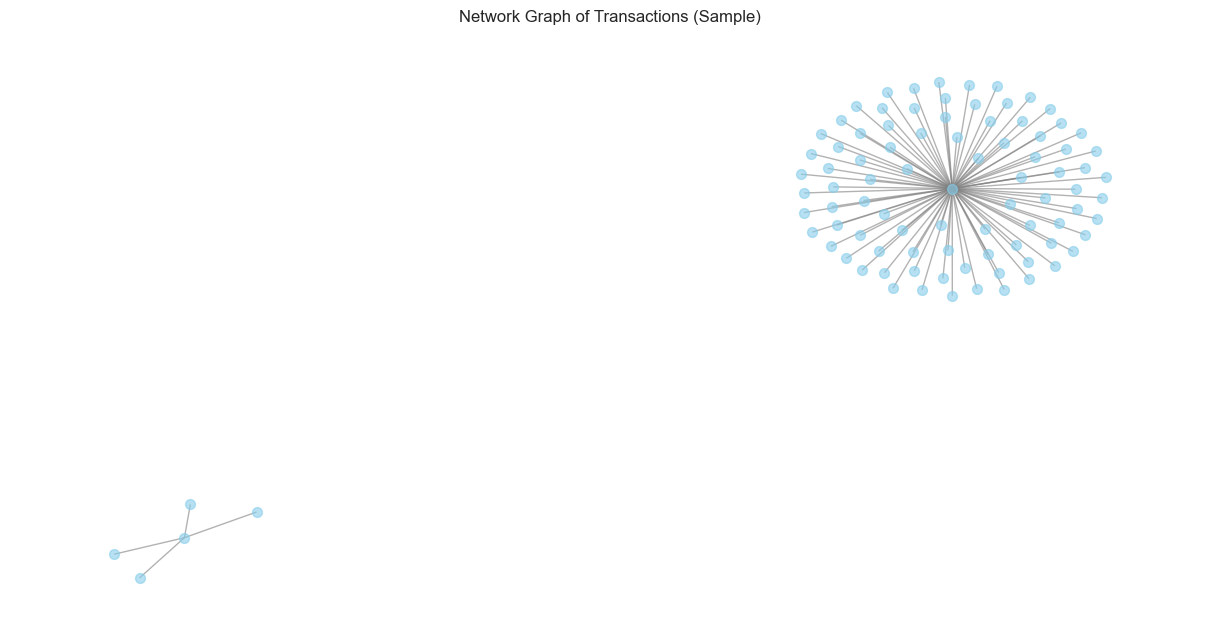

In [38]:
# Cell 16: Analyze transaction chains or repeated From-To pairs
# Group by From-To pairs to find frequent interactions.
# This can indicate patterns like loops or suspicious repeated transfers.
pair_counts = df.groupby(['From', 'To']).size().sort_values(ascending=False).head(10)
print("Top 10 From-To Pairs by Frequency:")
display(pair_counts)

# Visualize as a network graph if small (using networkx for depth)
import networkx as nx
G = nx.from_pandas_edgelist(df.head(100), 'From', 'To', edge_attr='Value')  # Limit to first 100 for simplicity
plt.figure(figsize=(12, 6))
nx.draw(G, with_labels=False, node_size=50, edge_color='gray', node_color='skyblue', alpha=0.6)
plt.title('Network Graph of Transactions (Sample)')
plt.show()

In [39]:
# Cell 17: Outlier detection in Value using IQR
# Identify outliers which might be fraudulent or high-risk transactions.
# Boxplot already showed, but here quantify and list them for intensity.
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Value'] < (Q1 - 1.5 * IQR)) | (df['Value'] > (Q3 + 1.5 * IQR))]

print(f"Number of Outliers in Value: {len(outliers)}")
print("Outlier Transactions:")
display(outliers[['TxHash', 'Value', 'isError']])

# Percentage of outliers that are errors
if len(outliers) > 0:
    outlier_error_rate = outliers['isError'].mean() * 100
    print(f"Error Rate in Outliers: {outlier_error_rate:.2f}%")

Number of Outliers in Value: 32341
Outlier Transactions:


,TxHash,Value,isError
31,0x954477a9cc47992008628267c94fb69d62200ff6c517...,3.400000,0
62,0x5777655e6401b7dd7a1c83544758832b9a2d7dc988ec...,15.729068,0
70,0x84bb7d47199f136c0ce2fb5226c7c30db118cb0088d0...,3.664102,0
87,0x9afbaa3e29f358f46720c5919b9733bc6b2b64e5cf00...,6.784564,0
88,0xbc7bbd31be4df34b48b60063f64f0318fbbe0e4f72e3...,1.500000,0
...,...,...,...
254918,0x3f3f4ff56fd8c8a123196f51f6aec1f1686f890bc998...,2.396030,0
254935,0x46fb46d37c857d77430fce8951679e0b88a431162415...,3.010000,0
254936,0xa180e83e6a1393483f7e12d6a84fda6b0dbd57101470...,2.082514,0
254963,0x962d230e22cf34685096e222c42d7a0f15f5cf444c2b...,2.500000,0


Error Rate in Outliers: 0.23%


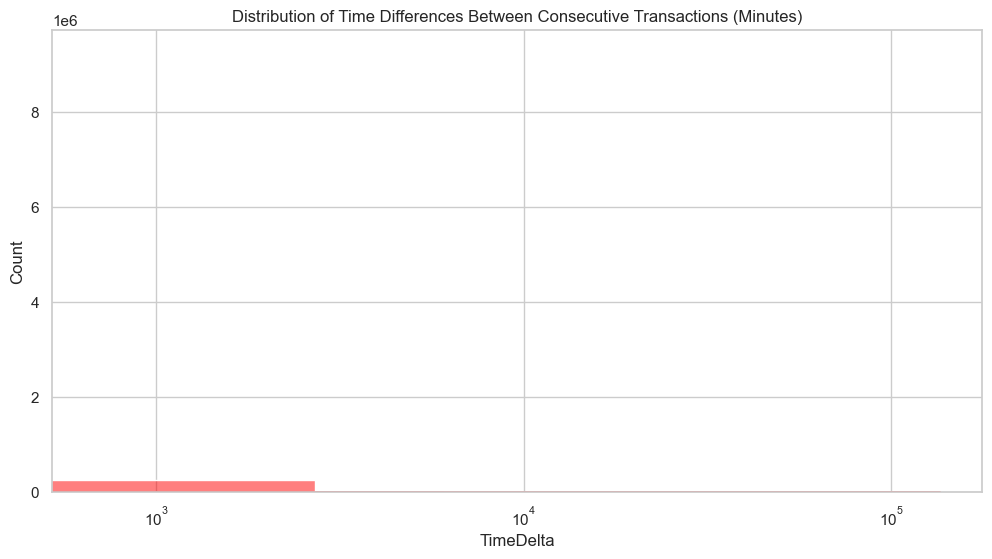

Average Time Delta (minutes) by isError:


isError
0    5.030879
1    5.731264
Name: TimeDelta, dtype: float64

In [40]:
# Cell 18: Time differences between consecutive transactions
# Calculate time deltas to analyze transaction speed/frequency.
# Sort by TimeStamp, compute diffs, and plot distribution.
df_sorted = df.sort_values('TimeStamp')
df_sorted['TimeDelta'] = df_sorted['TimeStamp'].diff().dt.total_seconds() / 60  # In minutes

plt.figure(figsize=(12, 6))
sns.histplot(df_sorted['TimeDelta'].dropna(), bins=50, kde=True, color='red')
plt.title('Distribution of Time Differences Between Consecutive Transactions (Minutes)')
plt.xscale('log')
plt.show()

# Average time delta by isError
print("Average Time Delta (minutes) by isError:")
display(df_sorted.groupby('isError')['TimeDelta'].mean())

<Figure size 1400x600 with 0 Axes>

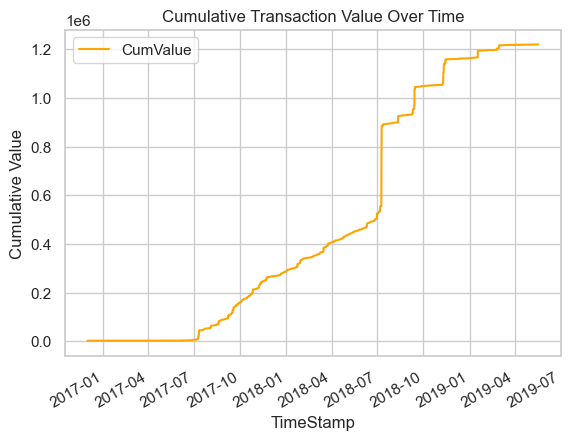

In [42]:
# Cell 19: Cumulative sum of Values over time
# Plot cumulative transaction values to see growth patterns.
# Separate by isError for comparison if errors exist.
plt.figure(figsize=(14, 6))
df_sorted['CumValue'] = df_sorted['Value'].cumsum()
df_sorted.plot(x='TimeStamp', y='CumValue', kind='line', color='orange')
plt.title('Cumulative Transaction Value Over Time')
plt.ylabel('Cumulative Value')
plt.show()

# If errors, plot separate cumulatives
# if df['isError'].sum() > 0:
#     error_cum = df_sorted[df_sorted['isError'] == 1]['Value'].cumsum()
#     non_error_cum = df_sorted[df_sorted['isError'] == 0]['Value'].cumsum()
#     plt.figure(figsize=(14, 6))
#     plt.plot(df_sorted['TimeStamp'], non_error_cum, label='Non-Error', color='green')
#     plt.plot(df_sorted['TimeStamp'], error_cum, label='Error', color='red')
#     plt.title('Cumulative Value by isError Over Time')
#     plt.ylabel('Cumulative Value')
#     plt.legend()
#     plt.show()